In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. 

* Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

* This would be helpful if we are to train our model to take NLP inputs.


In [2]:
df = pd.read_csv('D:/DS/mindtree_updated.csv')
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
0,1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,...,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
1,2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,...,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
2,3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,...,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
3,4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,...,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
4,5,MINDTREE,EQ,2017-05-22,497.50,499.95,511.85,497.10,501.55,502.35,...,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


In [3]:
#Using the pandas_profiling function of pandas to obtain and extensive preiminary report
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,493
Total Missing (%),0.0%
Total size in memory,81.0 KiB
Average record size in memory,168.2 B
Numeric,7
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,12


In [4]:
df['Date'].dtype

dtype('O')

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].dtype

dtype('<M8[ns]')

In [6]:
df.set_index('Date').head()

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-16,1,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
2017-05-17,2,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
2017-05-18,3,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
2017-05-19,4,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
2017-05-22,5,MINDTREE,EQ,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


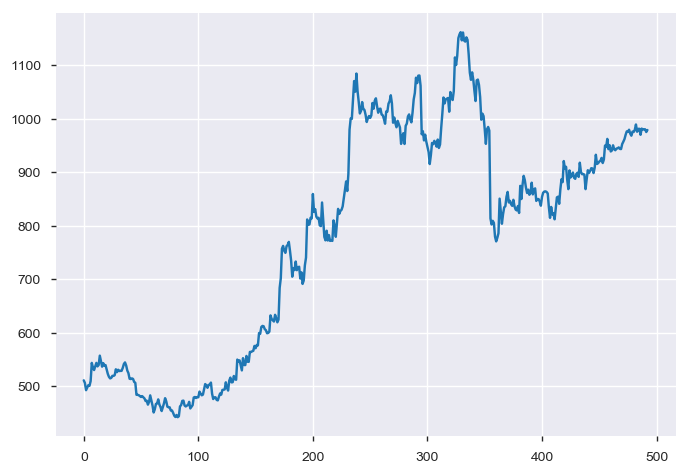

In [7]:
df['Close Price'].plot()
plt.show()

# Problem Statement 2.2

A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

In [8]:
date = df['Date']
dpc = df['Day_Perc_Change']
ttc = df['Total Traded Quantity']

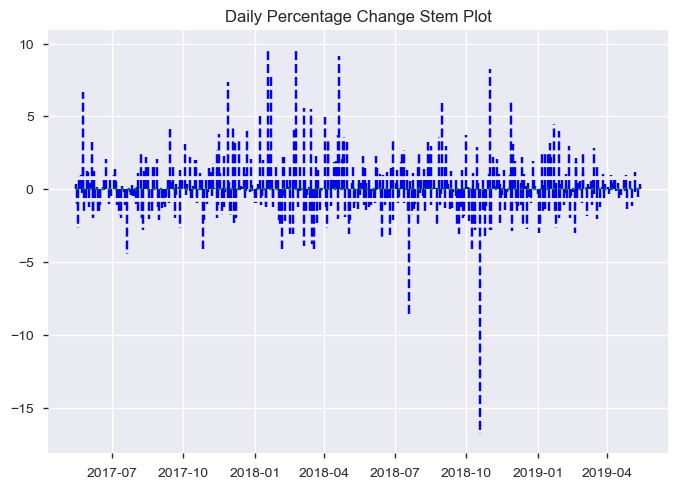

In [9]:
a = plt.stem(date, dpc, markerfmt = 'b ', linefmt = 'b--', basefmt = 'g:')
plt.title('Daily Percentage Change Stem Plot')
plt.show()

# Problem Statement 2.3

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

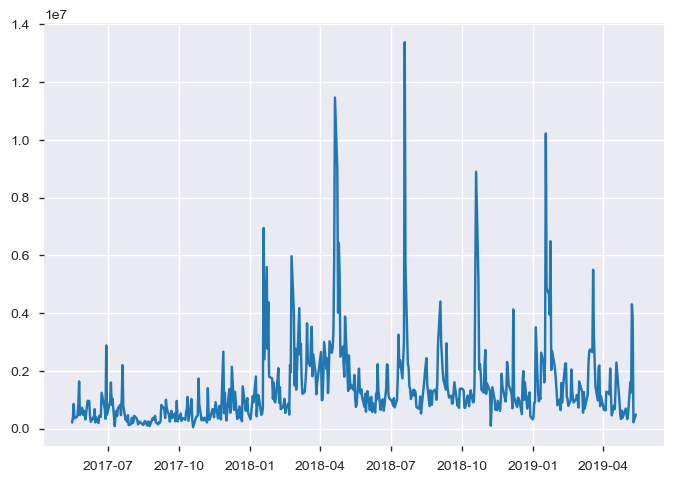

In [10]:
b = plt.plot(date, ttc)

In [11]:
x = df['Date']
y1 = df['Day_Perc_Change']
y2 = df['Total Traded Quantity']

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


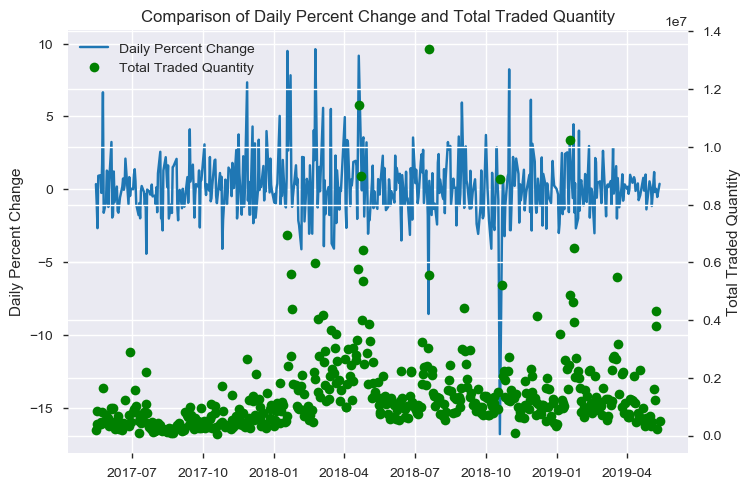

In [12]:
fig = plt.figure()
plt.title('Comparison of Daily Percent Change and Total Traded Quantity')
host = fig.add_subplot(111)
par = host.twinx() #to create a parralel y axis
host.set_ylabel('Daily Percent Change')
par.set_ylabel('Total Traded Quantity')
line1, = host.plot(x, y1)
line2, = par.plot(x, y2, 'go')
host.legend([line1, line2], ['Daily Percent Change', 'Total Traded Quantity'])
plt.show()

# Problem Statement 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 


In [13]:
df.sample(5)

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
409,410,MINDTREE,EQ,2019-01-08,835.35,836.00,837.05,819.2,820.15,821.20,...,943753,7.773989e+08,31919,198595,21.04,410,1,2019,-1.693901,Negative
437,438,MINDTREE,EQ,2019-02-15,897.00,899.00,903.90,889.1,894.70,895.50,...,786612,7.048395e+08,28699,262479,33.37,438,2,2019,-0.167224,Slight or No change
89,90,MINDTREE,EQ,2017-09-21,464.30,465.10,469.30,453.5,463.55,462.50,...,613293,2.818106e+08,17257,285510,46.55,90,9,2017,-0.387680,Slight or No change
176,177,MINDTREE,EQ,2018-01-25,753.45,762.80,770.25,747.0,750.00,749.55,...,1800526,1.364250e+09,51348,665777,36.98,177,1,2018,-0.517619,Slight Negative
305,306,MINDTREE,EQ,2018-08-02,954.90,955.05,969.00,943.8,947.00,952.55,...,1243826,1.192789e+09,29076,321284,25.83,306,8,2018,-0.246099,Slight or No change


In [14]:
df.groupby(['Trend']).count()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change
Trend,,,,,,,,,,,,,,,,,,,,
Among top gainers,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Among top losers,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Bear drop,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bull run,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Negative,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
Positive,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
Slight Negative,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
Slight Positive,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
Slight or No change,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141


#### Hence, we get the corresponding values for each trend value

## Pie Chart

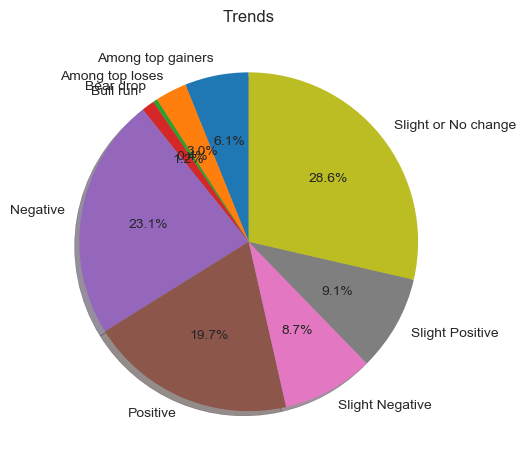

In [15]:
slices = [30, 15, 2, 6, 114, 97, 43, 45, 141]
trends = ['Among top gainers', 'Among top loses', 'Bear drop', 'Bull run', 'Negative', 'Positive', 
         'Slight Negative', 'Slight Positive', 'Slight or No change']
plt.pie(slices,
        labels=trends,
        startangle=90,
        shadow= True,
        #explode=(0,0.1,0,0)
        autopct='%1.1f%%'
       )
plt.title('Trends')
plt.show()

## Bar Graphs

### For Mean volume traded grouped by Trends

In [16]:
mean = pd.DataFrame(df.groupby(['Trend']).mean())
mean

,Unnamed: 0,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change
Trend,,,,,,,,,,,,,,,,,
Among top gainers,230.166667,771.113333,774.250000,808.871667,770.153333,803.846667,802.478333,793.953000,2.577386e+06,2.230225e+09,55002.133333,5.118483e+05,24.136000,230.166667,6.366667,2017.800000,4.082488
Among top losers,241.466667,844.033333,840.173333,846.676667,802.876667,816.326667,814.483333,821.087333,1.674413e+06,1.371481e+09,40008.866667,4.419369e+05,27.040000,241.466667,5.333333,2017.933333,-3.552703
Bear drop,326.000000,1019.875000,985.500000,990.525000,866.725000,899.450000,892.525000,902.610000,1.113917e+07,1.020655e+10,301654.000000,1.782819e+06,16.315000,326.000000,8.500000,2018.000000,-12.656138
Bull run,212.333333,710.691667,722.825000,787.066667,718.800000,773.800000,772.358333,755.383333,5.893131e+06,4.699885e+09,106306.666667,9.150388e+05,17.595000,212.333333,4.833333,2017.833333,8.609432
Negative,241.263158,790.377632,791.000439,798.063158,769.477632,776.860088,776.950877,782.554912,1.337232e+06,1.162066e+09,34097.342105,3.303731e+05,28.802719,241.263158,6.649123,2017.824561,-1.698213
Positive,249.969072,781.746907,783.122165,802.498454,776.042784,796.101546,795.743814,791.928660,1.490484e+06,1.307579e+09,35355.639175,3.593694e+05,29.204227,249.969072,6.690722,2017.855670,1.780596
Slight Negative,249.023256,786.004651,786.627907,793.482558,771.886047,779.795349,779.891860,782.324186,1.024758e+06,8.643636e+08,26737.744186,2.541401e+05,28.546047,249.023256,6.604651,2017.860465,-0.784336
Slight Positive,263.622222,792.095556,794.252222,806.687778,787.664444,797.807778,797.807778,798.339333,1.308610e+06,1.134761e+09,30869.288889,3.447826e+05,28.733778,263.622222,6.066667,2017.955556,0.727035
Slight or No change,248.198582,755.948227,757.682979,765.102837,749.137589,756.104255,756.199291,757.315532,8.911756e+05,7.439364e+08,20974.482270,2.907617e+05,31.749078,248.198582,6.510638,2017.865248,0.022414


In [17]:
newmean = mean.reset_index()
newmean['Trend']

0      Among top gainers
1       Among top losers
2              Bear drop
3               Bull run
4               Negative
5               Positive
6        Slight Negative
7        Slight Positive
8    Slight or No change
Name: Trend, dtype: object

In [18]:
newmean['Total Traded Quantity']

0    2.577386e+06
1    1.674413e+06
2    1.113917e+07
3    5.893131e+06
4    1.337232e+06
5    1.490484e+06
6    1.024758e+06
7    1.308610e+06
8    8.911756e+05
Name: Total Traded Quantity, dtype: float64

In [19]:
x= newmean['Trend'].tolist()
y = newmean['Total Traded Quantity'].tolist()
x_pos = np.arange(len(x))

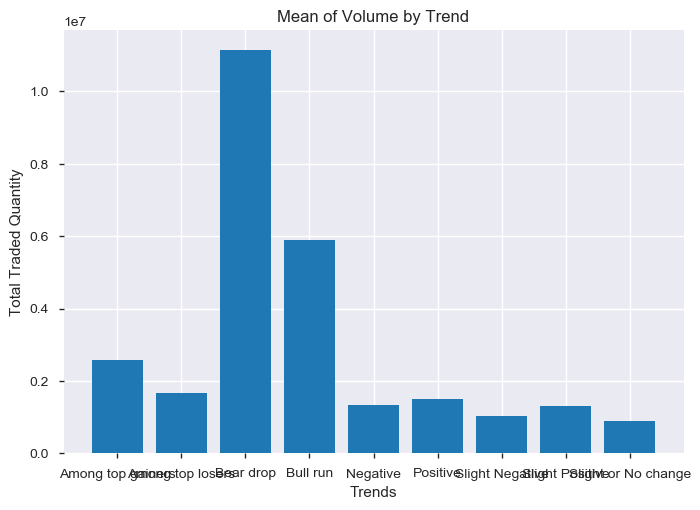

In [20]:
#main plot
plt.bar(x_pos, y)
plt.xlabel("Trends")
plt.ylabel("Total Traded Quantity")
plt.title("Mean of Volume by Trend")
plt.xticks(x_pos, x)
plt.show()

In [21]:
median = pd.DataFrame(df.groupby(['Trend']).median())
newmedian = median.reset_index()
newmedian

,Trend,Unnamed: 0,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change
0,Among top gainers,222.5,810.000,807.600,860.550,806.850,852.50,851.600,835.38,1787215.0,1.510202e+09,45869.0,401838.0,23.580,222.5,5.5,2018.0,3.743869
1,Among top losers,211.0,843.650,839.000,842.950,809.100,813.90,812.350,823.49,1729223.0,1.317216e+09,35789.0,399006.0,24.330,211.0,5.0,2018.0,-3.499392
2,Bear drop,326.0,1019.875,985.500,990.525,866.725,899.45,892.525,902.61,11139174.5,1.020655e+10,301654.0,1782819.0,16.315,326.0,8.5,2018.0,-12.656138
3,Bull run,185.0,721.550,722.975,800.225,718.725,784.00,784.625,765.17,5782802.5,4.429253e+09,107509.5,799494.5,16.920,185.0,3.0,2018.0,8.696653
4,Negative,251.0,836.225,841.000,848.250,819.600,822.75,823.175,830.00,1005798.0,8.866096e+08,26576.0,249005.5,27.295,251.0,7.0,2018.0,-1.609268
5,Positive,267.0,837.400,840.600,859.850,830.100,853.85,854.050,851.25,1219984.0,1.058582e+09,32305.0,309307.0,26.050,267.0,7.0,2018.0,1.653364
6,Slight Negative,274.0,850.050,850.350,866.200,840.100,847.00,845.600,854.63,762140.0,6.593827e+08,22297.0,220340.0,27.010,274.0,6.0,2018.0,-0.815827
7,Slight Positive,272.0,829.950,835.000,849.400,833.100,840.25,837.100,841.13,1046434.0,9.255425e+08,26318.0,249521.0,25.040,272.0,6.0,2018.0,0.708524
8,Slight or No change,235.0,821.200,825.000,839.000,820.100,823.50,823.450,828.80,771715.0,6.101587e+08,19578.0,198703.0,27.820,235.0,6.0,2018.0,0.043966


In [22]:
x = newmedian['Trend']
y = newmedian['Total Traded Quantity']
x_pos = np.arange(len(x))

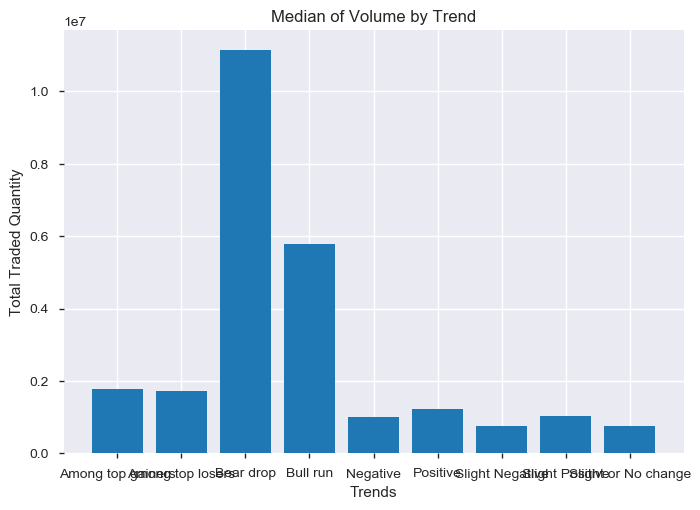

In [23]:
#main plot
plt.bar(x_pos, y)
plt.xlabel("Trends")
plt.ylabel("Total Traded Quantity")
plt.title("Median of Volume by Trend")
plt.xticks(x_pos, x)
plt.show()

# Problem Statement 2.5
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

In [24]:
# to remove the redundant column
df = pd.read_csv('D:/DS/mindtree_updated.csv', index_col=[0])

In [25]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
5,MINDTREE,EQ,2017-05-22,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


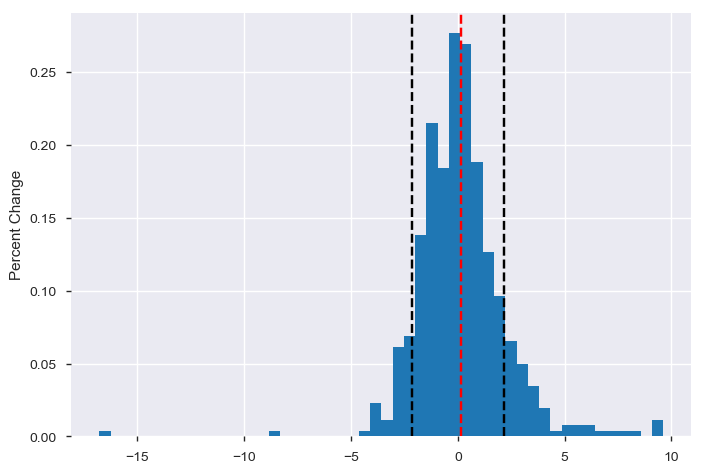

In [26]:
df['Day_Perc_Change'].hist(bins = 50, density = True)
plt.ylabel('Percent Change')
mean = df['Day_Perc_Change'].mean()
std = df['Day_Perc_Change'].std()
plt.axvline(x=mean, color='r', linestyle='--')
plt.axvline(x=std, color='k', linestyle='--')
plt.axvline(x=-std, color='k', linestyle='--')
plt.show()

# Problem Statement 2.6

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.
Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks.

In [30]:
ashoka = pd.read_csv('D:/DS/ASHOKA.csv')
suzlon = pd.read_csv('D:/DS/SUZLON.csv')
jet = pd.read_csv('D:/DS/JETAIRWAYS.csv')
fortis = pd.read_csv('D:/DS/FORTIS.csv')
raymond = pd.read_csv('D:/DS/RAYMOND.csv')

In [32]:
ashoka.sample(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
238,ASHOKA,EQ,27-Apr-2018,271.20,271.20,279.60,271.20,277.00,277.10,276.72,144272,3.992297e+07,4608,77691,53.85
100,ASHOKA,EQ,06-Oct-2017,195.05,196.40,204.50,191.10,195.75,198.85,198.25,385095,7.634582e+07,5524,159003,41.29
422,ASHOKA,EQ,24-Jan-2019,123.55,123.50,123.90,120.00,120.00,120.95,121.89,60196,7.337068e+06,2352,27933,46.40
89,ASHOKA,EQ,20-Sep-2017,193.10,194.40,197.60,193.45,196.00,196.05,195.56,67947,1.328786e+07,2469,41481,61.05
174,ASHOKA,EQ,22-Jan-2018,227.80,227.05,233.75,227.05,231.05,231.50,230.91,703400,1.624248e+08,4908,576416,81.95
76,ASHOKA,EQ,01-Sep-2017,195.45,197.20,197.20,191.70,193.75,192.75,193.86,101583,1.969290e+07,2065,52231,51.42
292,ASHOKA,EQ,13-Jul-2018,164.45,165.00,165.95,157.00,158.00,160.00,162.08,173078,2.805186e+07,5379,39556,22.85
183,ASHOKA,EQ,05-Feb-2018,222.90,218.20,219.50,209.90,217.80,218.80,217.06,163986,3.559559e+07,4320,102837,62.71
460,ASHOKA,EQ,20-Mar-2019,134.05,134.30,135.45,128.00,128.30,128.85,130.36,505253,6.586241e+07,8506,302861,59.94
39,ASHOKA,EQ,10-Jul-2017,190.00,191.65,191.65,186.00,188.20,188.45,188.66,4308,8.127549e+05,152,2633,61.12


In [34]:
ashoka = ashoka[ashoka.Series == 'EQ']
suzlon = suzlon[suzlon.Series == 'EQ']
jet = jet[jet.Series == 'EQ']
fortis = fortis[fortis.Series == 'EQ']
raymond = raymond[raymond.Series == 'EQ']

In [35]:
close_price = pd.DataFrame(ashoka['Close Price'])

In [36]:
close_price.head()

,Close Price
0,216.05
1,214.90
2,217.00
3,209.65
4,206.25


In [40]:
close_price['Ashoka'] = ashoka['Close Price']
close_price['Suzlon'] = suzlon['Close Price']
close_price['Jet Airways'] = jet['Close Price']
close_price['Fortis'] = fortis['Close Price']
close_price['Raymond'] = raymond['Close Price']

In [41]:
close_price.head()

,Close Price,Suzlon,Ashoka,Jet Airways,Fortis,Raymond
0,216.05,19.6,216.05,527.50,205.25,772.80
1,214.90,19.7,214.90,534.15,207.90,785.00
2,217.00,19.9,217.00,528.90,205.90,783.65
3,209.65,20.0,209.65,522.70,196.85,746.95
4,206.25,20.6,206.25,520.40,203.55,723.10


In [42]:
del close_price['Close Price']

In [44]:
close_price.shape

(494, 5)